# PA2 Notebook 2c: Sum HUC12 Net by Cluster

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

## Import Python Dependencies

In [1]:
from pathlib import Path
from importlib import reload

import numpy     as np
import pandas    as pd
import geopandas as gpd

import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
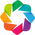

In [2]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

## Set Paths


In [3]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [4]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography/'
# Assign a path for the data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output/'

## Test Plotting

In [5]:
# create sample data
data = np.random.normal(size=[50, 2])
df = pd.DataFrame(data, columns=['col1', 'col2'])

# create holoviews graph
hv_plot = hv.Points(df)
hv_plot

:Points   [col1,col2]

# Import Data

## Open Files for Geographies

In [6]:
# read geometry data from GeoParquet files
# huc12_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_outlets_drwi_gdf.parquet')
huc10_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc10_outlets_drwi_gdf.parquet')
huc08_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc08_outlets_drwi_gdf.parquet')

## Open Files from Notebooks 2 & 2b

In [7]:
# Results by COMID
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')


In [8]:
# Summed catch loads by HUC12, using Method 1 from Notebook 2
huc12_load_gdf = gpd.read_parquet(
    data_output_path / 'huc12_load_gdf.parquet'
)

# Net reach loads over HUC12, using Method 2 from Notebook 2b
huc12_outlet_loads_gdf = gpd.read_parquet(
    data_output_path / 'huc12_outlet_loads_gdf.parquet'
)

# Find HUC12s in Clusters

## Explore Approach

In [9]:
pa.calc.clusters

{'drb': 'DRB',
 'Brandywine and Christina': 'BCC',
 'Kirkwood - Cohansey Aquifer': 'KCC',
 'Middle Schuylkill': 'MSC',
 'New Jersey Highlands': 'NJHC',
 'Poconos and Kittatinny': 'PKC',
 'Schuylkill Highlands': 'SHC',
 'Upper Lehigh': 'ULC',
 'Upstream Suburban Philadelphia': 'USPC'}

In [10]:
pa.calc.clusters.values()

dict_values(['DRB', 'BCC', 'KCC', 'MSC', 'NJHC', 'PKC', 'SHC', 'ULC', 'USPC'])

In [11]:
reach_concs_gdf.cluster.cat.categories

Index(['Brandywine and Christina', 'Kirkwood - Cohansey Aquifer',
       'Middle Schuylkill', 'New Jersey Highlands', 'Poconos and Kittatinny',
       'Schuylkill Highlands', 'Upper Lehigh',
       'Upstream Suburban Philadelphia', 'drb'],
      dtype='object')

In [12]:
df = reach_concs_gdf.loc[reach_concs_gdf.cluster=='Brandywine and Christina']
df.huc12.value_counts().gt(0)

huc12
020402050402     True
020402050401     True
020402050303     True
020402050202     True
020402050105     True
                ...  
020401050701    False
020401050605    False
020401050604    False
020401050603    False
020403030101    False
Name: count, Length: 484, dtype: bool

In [13]:
len(df.huc12.value_counts()[df.huc12.value_counts().gt(0)].index.values)

26

In [14]:
huc12_list = list(df.huc12.value_counts()[df.huc12.value_counts().gt(0)].index.values)

In [15]:
len(huc12_list)

26

In [16]:
huc12_outlet_loads_gdf.index.isin(huc12_list)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Apply Cluster tags to every HUC12

In [17]:
for cluster_name, cluster_abrev in pa.calc.clusters.items():
    print(cluster_name, cluster_abrev)
    df = reach_concs_gdf[reach_concs_gdf.cluster==cluster_name]
    huc12_list = list(df.huc12.value_counts()[df.huc12.value_counts().gt(0)].index.values)
    print(len(huc12_list))
    print(huc12_list)
    huc12_outlet_loads_gdf[cluster_abrev] = huc12_outlet_loads_gdf.index.isin(huc12_list)

drb DRB
263
['020402070203', '020402060203', '020402060602', '020402060604', '020401030505', '020401030603', '020402050802', '020402060603', '020402020506', '020402020607', '020402020507', '020402020606', '020402020502', '020402060303', '020402020608', '020402020505', '020401030601', '020402020602', '020402070204', '020401030301', '020401030402', '020402070506', '020402050801', '020401010307', '020402020601', '020401010207', '020402030808', '020402070602', '020401040104', '020402031006', '020401010205', '020402070304', '020401030302', '020402030809', '020402030101', '020402030102', '020401050701', '020402010105', '020402070202', '020401020202', '020401050909', '020402010203', '020402030207', '020401010402', '020402031007', '020402020605', '020402070603', '020401020204', '020401010305', '020401030103', '020401050904', '020402020405', '020402020501', '020401010204', '020402010204', '020402030602', '020402010103', '020401050908', '020401020101', '020402070201', '020402070301', '0204010103

In [18]:
huc12_outlet_loads_gdf

,huc12_name,geometry,centroid_xy,comid,nord,to_huc12,outlet_comid,from_huc12s_original,inlet_comids,outlet_comids,...,maflowv_net,DRB,BCC,KCC,MSC,NJHC,PKC,SHC,ULC,USPC
huc12,,,,,,,,,,,,,,,,,,,,,
020401010101,Town Brook-Headwaters West Brach Delaware River,"POLYGON ((-8303725.462 5224646.990, -8303761.0...","[-74.62155936289159, 42.387091234041016]",2612792,74293,020401010102,2612792,None,None,[2612792],...,56.661,True,False,False,False,False,False,False,False,False
020401010102,Betty Brook-Headwaters West Brach Delaware River,"POLYGON ((-8315136.657 5225191.846, -8315097.2...","[-74.71393635968639, 42.38194565669812]",2612800,74290,020401010103,2612800,[020401010101],[2612792],"[2612800, 2612922]",...,40.396,True,False,False,False,False,False,False,False,False
020401010103,Rose Brook-Headwaters West Brach Delaware River,"POLYGON ((-8323990.577 5217953.339, -8323948.6...","[-74.71097819143394, 42.330665690562654]",2612808,74288,020401010104,2612808,[020401010102],[2612800],[2612808],...,44.661,True,False,False,False,False,False,False,False,False
020401010104,Elk Creek-Headwaters West Brach Delaware River,"POLYGON ((-8326727.279 5222215.417, -8326605.6...","[-74.82334627464569, 42.34506256688788]",2612820,74282,020401010106,2612820,[020401010103],[2612808],[2612820],...,46.591,True,False,False,False,False,False,False,False,False
020401010105,Upper Little Delaware River,"POLYGON ((-8319654.283 5208307.086, -8319607.8...","[-74.78436638151948, 42.27096486797448]",2612842,74311,020401010106,2612842,None,None,[2612842],...,98.559,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
020403020403,Absecon Bay,"POLYGON ((-8277929.484 4780388.338, -8278050.1...","[-74.44604887400864, 39.417944290515535]",9436627,125390,020403020408,9436627,[020403020401],[9436775],[],...,-29.176,False,False,False,False,False,False,False,False,False
020403020404,Cape May Harbor-Cape May Inlet,"POLYGON ((-8335529.098 4723951.934, -8335439.6...","[-74.8841890564985, 38.973283432181894]",9437503,120596,020403020500,9437503,None,None,"[9437503, 9438907, 9438927]",...,21.541,False,False,False,False,False,False,False,False,False
020403020405,Great Channel-Hereford Inlet,"POLYGON ((-8320042.885 4732976.676, -8320161.1...","[-74.81118396051109, 39.05056352723319]",9438919,123313,020403020500,9438919,None,None,"[9438919, 9438933, 9438959, 9436483]",...,7.133,False,False,False,False,False,False,False,False,False


In [23]:
huc12_outlet_loads_gdf.columns

Index(['huc12_name', 'geometry', 'centroid_xy', 'comid', 'nord', 'to_huc12',
       'outlet_comid', 'from_huc12s_original', 'inlet_comids', 'outlet_comids',
       'huc10', 'huc08', 'in_drb', 'catchment_hectares', 'maflowv', 'tn_load',
       'tp_load', 'tss_load', 'tn_load_ps', 'tp_load_ps', 'tss_load_ps',
       'tn_load_xsnps', 'tp_load_xsnps', 'tss_load_xsnps', 'tn_load_red1',
       'tp_load_red1', 'tss_load_red1', 'tn_load_red2', 'tp_load_red2',
       'tss_load_red2', 'tn_load_red3', 'tp_load_red3', 'tss_load_red3',
       'tn_load_rem1', 'tp_load_rem1', 'tss_load_rem1', 'tn_load_rem2',
       'tp_load_rem2', 'tss_load_rem2', 'tn_load_rem3', 'tp_load_rem3',
       'tss_load_rem3', 'tn_load_net', 'tp_load_net', 'tss_load_net',
       'tn_load_ps_net', 'tp_load_ps_net', 'tss_load_ps_net',
       'tn_load_xsnps_net', 'tp_load_xsnps_net', 'tss_load_xsnps_net',
       'tn_load_red1_net', 'tp_load_red1_net', 'tss_load_red1_net',
       'tn_load_red2_net', 'tp_load_red2_net', 'tss_load

In [31]:
huc12_outlet_loads_gdf.loc[huc12_outlet_loads_gdf['BCC']==True, ['catchment_hectares']].sum()

catchment_hectares    8681.9484
dtype: float64

In [20]:
huc12_outlet_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   huc12_name            481 non-null    category
 1   geometry              481 non-null    geometry
 2   centroid_xy           481 non-null    object  
 3   comid                 481 non-null    Int64   
 4   nord                  481 non-null    Int64   
 5   to_huc12              481 non-null    category
 6   outlet_comid          481 non-null    Int64   
 7   from_huc12s_original  231 non-null    object  
 8   inlet_comids          231 non-null    object  
 9   outlet_comids         481 non-null    object  
 10  huc10                 481 non-null    category
 11  huc08                 481 non-null    category
 12  in_drb                481 non-null    boolean 
 13  catchment_hectares    481 non-null    float64 
 14  maflowv               48

# HUC10?

In [26]:
df.huc10.value_counts().gt(0).value_counts()

count
False    91
True      5
Name: count, dtype: int64

In [8]:
reach_concs_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   maflowv             19496 non-null  float64 
 3   geometry            19494 non-null  geometry
 4   cluster             17358 non-null  category
 5   sub_focusarea       186 non-null    Int64   
 6   nord                18870 non-null  Int64   
 7   nordstop            18844 non-null  Int64   
 8   huc12               19496 non-null  category
 9   streamorder         19496 non-null  int64   
 10  headwater           19496 non-null  int64   
 11  phase               4082 non-null   category
 12  fa_name             4082 non-null   category
 13  in_drb              19496 non-null  boolean 
 14  huc08               19496 non-null  category
 15  huc10               194

In [24]:
huc12_outlet_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   huc12_name          481 non-null    category
 1   geometry            481 non-null    geometry
 2   centroid_xy         481 non-null    object  
 3   comid               481 non-null    Int64   
 4   nord                481 non-null    Int64   
 5   to_huc12            481 non-null    category
 6   outlet_comid        481 non-null    Int64   
 7   from_huc12s         231 non-null    object  
 8   inlet_comids        231 non-null    object  
 9   outlet_comids       481 non-null    object  
 10  huc10               481 non-null    category
 11  huc08               481 non-null    category
 12  in_drb              481 non-null    boolean 
 13  catchment_hectares  481 non-null    float64 
 14  maflowv             481 non-null    float64 
 15  tn_loa

In [8]:
columns = ['huc12', 'huc08', 'huc10',]
frac_of_huc12_df = catch_loads_gdf[columns].copy()

In [9]:
frac_of_huc12_df

,huc12,huc08,huc10
comid,,,
1748535,020401020302,02040102,0204010203
1748537,020401020302,02040102,0204010203
1748539,020401020305,02040102,0204010203
1748541,020401020302,02040102,0204010203
1748543,020401020305,02040102,0204010203
...,...,...,...
932040366,020402060103,02040206,0204020601
932040367,020402060103,02040206,0204020601
932040368,020402060103,02040206,0204020601


In [12]:
catch_load_huc12_df = catch_loads_gdf[['huc12']].join(huc12_load_gdf['tp_load'], on='huc12')
catch_load_huc12_df

,huc12,tp_load
comid,,
1748535,020401020302,2524.370516
1748537,020401020302,2524.370516
1748539,020401020305,1756.750164
1748541,020401020302,2524.370516
1748543,020401020305,1756.750164
...,...,...
932040366,020402060103,16843.861523
932040367,020402060103,16843.861523
932040368,020402060103,16843.861523


In [13]:
# Add columns with huc12 fraction
for pollutant in ['tn', 'tp', 'tss']:
    var = f'{pollutant}_load'
    catch_load_huc12_df = catch_loads_gdf[['huc12']].join(huc12_load_gdf[var], on='huc12')
    catch_loads_gdf[f'{var}_huc12_frac'] = (
        catch_loads_gdf[var]/catch_load_huc12_df[var]
    )
    

In [14]:
# confirm this adds up
HUC12_df = catch_loads_gdf.huc12=='020401020302'
x = catch_loads_gdf[HUC12_df][['huc12','tp_load', f'tp_load_huc12_frac']]
x

,huc12,tp_load,tp_load_huc12_frac
comid,,,
1748535,020401020302,1189.608231,0.471249
1748537,020401020302,363.366436,0.143943
1748541,020401020302,668.969079,0.265004
1748709,020401020302,38.967378,0.015436
1748711,020401020302,263.459392,0.104366


In [15]:
x[f'tp_load_huc12_frac'].sum()

1.0

# Distribute HUC12 net loads to Reaches

In [16]:
reach_loads_huc12_gdf = reach_concs_gdf.iloc[:,0:25].copy()

In [19]:
# Calc net pollution loads
df = reach_loads_huc12_gdf

for suffix in ['', '_ps', '_xsnps', '_rem1', '_rem2', '_rem3']:
    for pollutant in ['tn', 'tp', 'tss']:
        var = f'{pollutant}_load{suffix}'
        df[f'{var}_net'] = (
            huc12_outlet_loads_gdf[f'{var}_net']
            * catch_loads_gdf[f'{pollutant}_load_huc12_frac']
        )

In [22]:
huc12_outlet_loads_gdf[f'{var}_net']

huc12
020401010101   -1.064444e+07
020401010102   -7.759074e+06
020401010103   -8.760651e+06
020401010104   -8.984379e+06
020401010105   -1.879417e+07
                    ...     
020403020403             NaN
020403020404   -7.639154e+05
020403020405    1.619655e+06
020403020406    4.857373e+06
020403020407    1.175424e+05
Name: tss_load_rem3_net, Length: 481, dtype: float64

In [23]:
catch_loads_gdf[f'{pollutant}_load_huc12_frac']

comid
1748535      0.493521
1748537      0.090197
1748539      0.210578
1748541      0.276735
1748543      0.166647
               ...   
932040366    0.360861
932040367    0.106630
932040368    0.019050
932040369    0.208186
932040370    0.628331
Name: tss_load_huc12_frac, Length: 19496, dtype: float64

In [21]:
reach_loads_huc12_gdf.info()
reach_loads_huc12_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  19496 non-null  float64 
 1   watershed_hectares  19496 non-null  float64 
 2   maflowv             19496 non-null  float64 
 3   geometry            19494 non-null  geometry
 4   cluster             17358 non-null  category
 5   sub_focusarea       186 non-null    Int64   
 6   nord                18870 non-null  Int64   
 7   nordstop            18844 non-null  Int64   
 8   huc12               19496 non-null  category
 9   streamorder         19496 non-null  int64   
 10  headwater           19496 non-null  int64   
 11  phase               4082 non-null   category
 12  fa_name             4082 non-null   category
 13  in_drb              19496 non-null  boolean 
 14  huc08               19496 non-null  category
 15  huc10               194

,catchment_hectares,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,...,tss_load_xsnps_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
comid,,,,,,,,,,,,,,,,,,,,,
1748535,6496.7052,6501.69,43.699,MULTILINESTRING Z ((-8295323.930 5214456.622 0...,drb,<NA>,74914,74914,020401020302,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748537,1663.1712,1664.46,11.189,MULTILINESTRING Z ((-8304623.226 5207684.737 0...,drb,<NA>,74913,74913,020401020302,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748539,1639.4128,1640.70,11.223,MULTILINESTRING Z ((-8316446.558 5197994.113 0...,drb,<NA>,74921,74921,020401020305,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748541,3013.8348,12912.30,86.528,MULTILINESTRING Z ((-8304282.841 5198049.613 0...,drb,<NA>,74911,74915,020401020302,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748543,1151.0990,5232.87,35.389,MULTILINESTRING Z ((-8312991.936 5192442.779 0...,drb,<NA>,74920,74922,020401020305,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
huc12_outlet_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   huc12_name          481 non-null    category
 1   geometry            481 non-null    geometry
 2   centroid_xy         481 non-null    object  
 3   comid               481 non-null    Int64   
 4   nord                481 non-null    Int64   
 5   to_huc12            481 non-null    category
 6   outlet_comid        481 non-null    Int64   
 7   from_huc12s         231 non-null    object  
 8   inlet_comids        231 non-null    object  
 9   outlet_comids       481 non-null    object  
 10  huc10               481 non-null    category
 11  huc08               481 non-null    category
 12  in_drb              481 non-null    boolean 
 13  catchment_hectares  481 non-null    float64 
 14  maflowv             481 non-null    float64 
 15  tn_loa